# Python для роботих файлами xlsx, csv, json
# Бібліотека pandas

## Чому вартує вивчити Python?


Python одна з провідних мов програмування, яка використовується у:
- науках про дані
- веб розробці
- системному адмініструванні
- ...

Python дозволяє користувачам:
- зберігати дані,
- доступатися до даних,
- опрацьовувати дані

Python має розвинену екосистему:
- засоби програмування
- бібліотеки

Python використовується у багатьох галузях, зокрема:
- охорона здоров'я
- фінанси
- сільськогосподарські технології
- консалтинг
- ...

Для роботи з даними в табличній формі часто використовується Excel, який вже не відповідає сучасним вимогам бізнесу 
- малі обсяги даних
- дані не в режимі реального часу
- спільна робота ускладнена (чи це важливо?)


Data scientist, Chris Cardillo: 
“If somebody spends more than four hours a day in Excel, they will undoubtedly benefit from learning Python/R.”

## Чому вартує використовувати Python для роботи з xlsx файлами (Excel) 
(https://www.dataquest.io/blog/9-reasons-excel-users-should-consider-learning-programming/)

- потужні засоби для імпортування даних та опрацювання даних
- автоматизація процесів в опрацюванні даних
- відтворюваність результатів опрацювання даних
- легко знайти та виправити помилки
- доступність (безкоштовність) та відкритий код
- потужні засоби для статистики та машинного навчання
- потужні засоби по візуалізації даних
- працездатність на різних платформах (Windows, Linux, Mac OS X) 


## Модулі стандартної бібліотеки



*   csv
*   json



## Бібліотека pandas

Бібліотека pandas забезпечує розробників швидкими, гнучкими та інуїтивно зрозумілими структурами даних, які значно спрощують роботу з даними. Найбільш потужна, швидка та гнучка біблотека з відкритим кодом для аналізу та опрацювання даних.
Дані можуть бути у наступному вигляді:
- Excel чи SQL таблиці (xlsx файл)
- Довільні матричні дані (csv, tsv файли)
- Інші формати (json файл)

Використовуються дві основні структури даних:
- Series (1D - одновимірна)
- DataFrame (2D - двовимірна)

DataFrame це контейнер для Series. Series це контейнер для склаярних даних. 
Структури даних - змінювані. Можуть змінюватися значення у цих структурах, але розмір структур може змінюватися не завжди.
Довжина Series не змінюється. До DataFrame можна додати стовпець.
Основний принцип - початкові дані не змінюються. Всі функції та методи створюють нові об'єкти.  

Перший етап при роботі з даними - підготовка даних.

Теоретично - маємо дані в належному вигляді та необхідного обсягу. 

Практично -  великий обсяг, складних та не структурованих даних.
80% часу роботи при роботі з даними витрачається на:
- підготовку даних
- дослідження даних
- візуалізацію даних 

Підготова даних передбачає:
- завантаження даних
- об'єднання даних
- очищення даних (виявлення та обробка помилок в даних)
- відновлення відсутніх даних

### Використання pandas для роботи з xlsx файлами
(https://www.dataquest.io/blog/excel-and-pandas/)

## 1. Набір даних

Використовується набір даних https://dq-blog-files.s3.amazonaws.com/movies.xls з Kaggle’s IMDB Scores data.  Набір даних містить інформацію про фільми які були сфільмовані у  20 столітті, перших 10 роках 21 століття та після 2010 року. Інформація про фільми знаходиться в трьох окремих таблицях 1900s, 2000s,2010s.


## 2. Імпортування даних

In [9]:
from google.colab import drive
drive.mount('/content/drive') #drive.mount('/Data')
%cd /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


In [10]:
import pandas as pd

Набір даних у форматі xls й потрібно використовувати функцію pandas read_excel для імпортування даних з файлу. Функція дозволяє автоматично прочитати першу таблицю, якщо в аргументах функції вказати шлях до файла. Змінна movies буде містити посилання на об'єкт типу DataFrame, який буде використовуватися для збереження набору даних.

In [11]:
excel_file = '/content/drive/MyDrive/Data/movies.xls'
movies = pd.read_excel(excel_file)
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


Для роботи з даними потрібно спочатку їх переглянути. Для цього є два методи head та tail. Метод head дозволяє вивести на екран перші рядки даних (за замовчуванням п'ять). Метод tail дозволяє вивести на екран останні п'ять рядків. За потреби можна вказати яку кількість рядків потрібно вивести на екран. 

In [12]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,Lillian Gish,Mae Marsh,Walter Long,204,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,Stephen Carr,Johnnie Walker,Mary Carr,0,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,John Gilbert,Renée Adorée,Claire Adams,54,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,756,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,Louise Brooks,Francis Lederer,Fritz Kortner,21,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [13]:
movies.tail()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1333,Twin Falls Idaho,1999,Drama,English,USA,R,111,1.85,500000.0,985341.0,Michael Polish,Sasha Alexander,William Katt,Jon Gries,35,980,505,482.0,3166,180,0,3479,87,54.0,7.3
1334,Universal Soldier: The Return,1999,Action|Sci-Fi,English,USA,R,83,1.85,24000000.0,10431220.0,Mic Rodgers,Michael Jai White,Daniel von Bargen,Xander Berkeley,7,2000,577,485.0,4024,401,0,24216,162,75.0,4.1
1335,Varsity Blues,1999,Comedy|Drama|Romance|Sport,English,USA,R,106,1.85,16000000.0,52885587.0,Brian Robbins,Paul Walker,Ron Lester,Mark Walters,48,23000,255,35.0,23369,0,0,35312,267,67.0,6.4
1336,Wild Wild West,1999,Action|Comedy|Sci-Fi|Western,English,USA,PG-13,106,1.85,170000000.0,113745408.0,Barry Sonnenfeld,Will Smith,Salma Hayek,Bai Ling,188,10000,4000,582.0,15870,0,2,129601,648,85.0,4.8
1337,Wing Commander,1999,Action|Adventure|Sci-Fi,English,USA,PG-13,100,2.35,30000000.0,11576087.0,Chris Roberts,Saffron Burrows,David Suchet,Jürgen Prochnow,38,811,586,362.0,2497,858,3,14747,338,85.0,4.1


Якщо у файлі декілька таблиць (аркушів) то за допомогою аргументу sheet_name функції read_excel можна вказати назву аркуша або номер аркуша. Номери аркушів починаються з нуля. Якщо аргумент sheetname  не вказаний, то за замовчуванням він дорівнює нулю, й імпортується перший аркуш.

Інший аргумент index_col функції read_excel використовується для встановлення індекса першого стовпчика. Можна залишити індекс за замовчуванням, якщо у даних немає стовпця з унікальними значеннями, який може слугувати кращим індексом. 

Наступний рядок дозволяє імпортувати перший аркуш.

In [15]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
movies_sheet1.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,Lillian Gish,Mae Marsh,Walter Long,204,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,Stephen Carr,Johnnie Walker,Mary Carr,0,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,John Gilbert,Renée Adorée,Claire Adams,54,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,756,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,Louise Brooks,Francis Lederer,Fritz Kortner,21,426,20,3.0,455,926,1,7431,84,71.0,8.0


Наступний рядок дозволяє імпортувати другий аркуш.

In [16]:
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
movies_sheet2.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,,,,
102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,Kevin Lima,Ioan Gruffudd,Eric Idle,Jim Carter,36,2000.0,795.0,439.0,4182,372,1,26413,77.0,84.0,4.8
28 Days,2000,Comedy|Drama,English,USA,PG-13,103.0,1.37,43000000.0,37035515.0,Betty Thomas,Steve Buscemi,Viggo Mortensen,Elizabeth Perkins,84,12000.0,10000.0,664.0,23864,0,1,34597,194.0,116.0,6.0
3 Strikes,2000,Comedy,English,USA,R,82.0,1.85,6000000.0,9821335.0,DJ Pooh,Mo'Nique,Mike Epps,Faizon Love,69,939.0,706.0,585.0,3354,118,1,1415,10.0,22.0,4.0
Aberdeen,2000,Drama,English,UK,NaN,106.0,1.85,6500000.0,64148.0,Hans Petter Moland,Charlotte Rampling,Sara-Marie Maltha,Stellan Skarsgård,19,844.0,2.0,0.0,846,260,0,2601,35.0,28.0,7.3
All the Pretty Horses,2000,Drama|Romance|Western,English,USA,PG-13,220.0,2.35,57000000.0,15527125.0,Billy Bob Thornton,Matt Damon,Henry Thomas,Sam Shepard,0,13000.0,861.0,820.0,15006,652,2,11388,183.0,85.0,5.8


Наступний рядок дозволяє імпортувати третій аркуш.

In [17]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)
movies_sheet3.head(15)

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,,,,
127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,Danny Boyle,James Franco,Treat Williams,Kate Burton,0.0,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,Eric Mendelsohn,Embeth Davidtz,Edie Falco,Kathryn Erbe,5.0,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,Tom Tykwer,Devid Striesow,Sebastian Schipper,Sophie Rois,670.0,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,Reed Cowan,Dustin Lance Black,Emily Pearson,Gavin Newsom,0.0,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,Ben Stassen,Ed Begley Jr.,Jenny McCarthy,Stacy Keach,4.0,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1
Alice in Wonderland,2010.0,Adventure|Family|Fantasy,English,USA,PG,108.0,1.85,200000000.0,334185206.0,Tim Burton,Johnny Depp,Alan Rickman,Anne Hathaway,13000.0,40000.0,25000.0,11000.0,79957,24000,0.0,306320,736.0,451.0,6.5
Alice in Wonderland,2010.0,Adventure|Family|Fantasy,English,USA,PG,108.0,1.85,200000000.0,334185206.0,Tim Burton,Johnny Depp,Alan Rickman,Anne Hathaway,13000.0,40000.0,25000.0,11000.0,79957,24000,0.0,306336,736.0,451.0,6.5
All Good Things,2010.0,Crime|Drama|Mystery|Romance|Thriller,English,USA,R,101.0,1.85,NaN,578382.0,Andrew Jarecki,Ryan Gosling,Kirsten Dunst,Frank Langella,46.0,33000.0,4000.0,902.0,39515,0,2.0,41249,67.0,140.0,6.3
Alpha and Omega,2010.0,Adventure|Animation|Comedy|Family|Romance,English,USA,PG,90.0,1.85,20000000.0,25077977.0,Anthony Bell,Kevin Sussman,Larry Miller,Christine Lakin,0.0,681.0,611.0,518.0,2486,0,0.0,10986,84.0,84.0,5.3


Оскільки, всі три таблиці містять подібні дані то можна їх об'єднати в єдиний DataFrame. Функція concat дозволяє отримати новий об'єкт який буде містити об'єднані дані. 

In [18]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

Для перевірки результату об'єднання доцільно дізнатися значення shape, яке містить розмір DataFrame. 

In [19]:
print(movies.shape)
print(movies_sheet1.shape, movies_sheet2.shape, movies_sheet3.shape)

(5042, 24)
(1338, 24) (2100, 24) (1604, 24)


Якщо потрібно імпортувати (прочитати) багато аркушів то потрібно скористатися класом ExcelFile.

In [20]:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
   movies_sheets.append(xlsx.parse(sheet))
movies1 = pd.concat(movies_sheets)
print(movies1.shape)

(5042, 25)


## 3. Перегляд та дослідження даних

З DataFrame можна працювати як з таблицею Excel. Pandas надає велике різноманіття засобів для цього.

In [21]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, Intolerance: Love's Struggle Throughout the Ages  to Yu-Gi-Oh! Duel Monsters             
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         4935 non-null   float64
 1   Genres                       5042 non-null   object 
 2   Language                     5031 non-null   object 
 3   Country                      5038 non-null   object 
 4   Content Rating               4740 non-null   object 
 5   Duration                     5028 non-null   float64
 6   Aspect Ratio                 4714 non-null   float64
 7   Budget                       4551 non-null   float64
 8   Gross Earnings               4159 non-null   float64
 9   Director                     4938 non-null   object 
 10  Actor 1                      5035 non-null   object 
 11  Actor 2                      5029 non-null   object 
 12  A

Наприклад, аналогічно до Excel можна за допомогою методу sort_values сортувати дані.

In [22]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

Оскільки дані відсортовані за Gross Earnings (валовим прибутком) то можна переглянути які фільми мали найвищі прибутки.

In [25]:
sorted_by_gross["Gross Earnings"].head(10)

Title
Avatar                                        760505847.0
Titanic                                       658672302.0
Jurassic World                                652177271.0
The Avengers                                  623279547.0
The Avengers                                  623279547.0
The Dark Knight                               533316061.0
Star Wars: Episode I - The Phantom Menace     474544677.0
Star Wars: Episode IV - A New Hope            460935665.0
Avengers: Age of Ultron                       458991599.0
The Dark Knight Rises                         448130642.0
Name: Gross Earnings, dtype: float64

Методи iloc та loc дозволяють переглядати стовпчики та рядки за їх індексами та мітками. Наприклад, щоб дізнатися який фільми мав найбільші прибутки можна переглянути відповідний рядок таблиці.

In [30]:
movies.iloc[1867]

Year                                                          2002
Genres                         Action|Crime|Drama|Romance|Thriller
Language                                                   English
Country                                                     France
Content Rating                                                   R
Duration                                                       109
Aspect Ratio                                                  1.85
Budget                                                     2.5e+07
Gross Earnings                                          3.5178e+06
Director                                               Neil Jordan
Actor 1                                             Emir Kusturica
Actor 2                                             Saïd Taghmaoui
Actor 3                                               Tchéky Karyo
Facebook Likes - Director                                      277
Facebook Likes - Actor 1                                      

In [27]:
movies['Year']

Title
Intolerance: Love's Struggle Throughout the Ages     1916.0
Over the Hill to the Poorhouse                       1920.0
The Big Parade                                       1925.0
Metropolis                                           1927.0
Pandora's Box                                        1929.0
                                                      ...  
War & Peace                                             NaN
Wings                                                   NaN
Wolf Creek                                              NaN
Wuthering Heights                                       NaN
Yu-Gi-Oh! Duel Monsters                                 NaN
Name: Year, Length: 5042, dtype: float64

Дані часто доцільно зображати у вигляді графіків. Pandas надає такі засоби. Хоча потрібно знати що вони реалізовані з використанням бібліотеки  matplotlib

In [31]:
import matplotlib.pyplot as plt

Наступний рядок коду дозволяє побудувати горизонтальну стовпчикову діаграму. Для цього використовується метод plot та вказується значення його аргументу kind для встановлення типу діаграми.

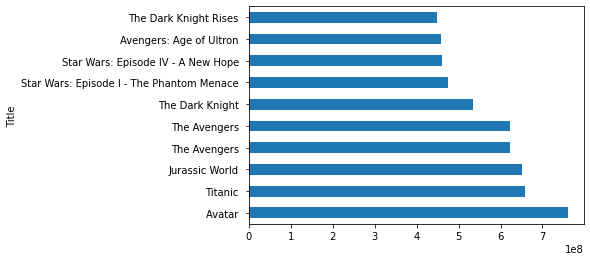

In [32]:
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")
plt.show()

Інший тип діаграми, який можна побудувати - гістограма. Якщо у стовпчику IMDB Score зберігаються дані про рейтинги фільмів то наступна гістограма показує їх розподіл.

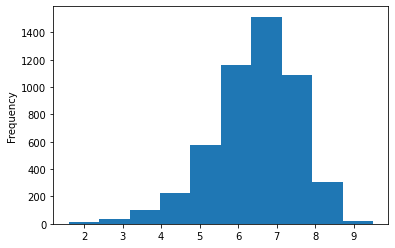

In [33]:
movies['IMDB Score'].plot(kind="hist")
plt.show()

## 3. Статистичні обчислення

Pandas надає засоби для статистичних досліджень даних. Метод describe обчислює декілька простих значень.

In [34]:
movies.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
count,4935.000000,5028.000000,4714.000000,4.551000e+03,4.159000e+03,4938.000000,5035.000000,5029.000000,5020.000000,5042.000000,5042.000000,5029.000000,5.042000e+03,5022.000000,4993.000000,5042.000000
mean,2002.470517,107.201074,2.220403,3.975262e+07,4.846841e+07,686.621709,6561.323932,1652.080533,645.009761,9700.959143,7527.457160,1.371446,8.368475e+04,272.770808,140.194272,6.442007
std,12.474599,25.197441,1.385113,2.061149e+08,6.845299e+07,2813.602405,15021.977635,4042.774685,1665.041728,18165.101925,19322.070537,2.013683,1.384940e+05,377.982886,121.601675,1.125189
min,1916.000000,7.000000,1.180000,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,1.600000
25%,1999.000000,93.000000,1.850000,6.000000e+06,5.340988e+06,7.000000,614.500000,281.000000,133.000000,1411.250000,0.000000,0.000000,8.599250e+03,65.000000,50.000000,5.800000
50%,2005.000000,103.000000,2.350000,2.000000e+07,2.551750e+07,49.000000,988.000000,595.000000,371.500000,3091.000000,166.000000,1.000000,3.437100e+04,156.000000,110.000000,6.600000
75%,2011.000000,118.000000,2.350000,4.500000e+07,6.230944e+07,194.750000,11000.000000,918.000000,636.000000,13758.750000,3000.000000,2.000000,9.634700e+04,326.000000,195.000000,7.200000
max,2016.000000,511.000000,16.000000,1.221550e+10,7.605058e+08,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,43.000000,1.689764e+06,5060.000000,813.000000,9.500000


Для кожного стовпчика, який містить числові значення обчислено:
- кількість значень у стовпчику
- середнє значення
- стандартне відхилення
- мінімальне та максимальне значення
- квантилі

Якщо потрібно провести окремі обчислення для певних стовпців то можна скористатися відповідними методами.

In [35]:
movies["Gross Earnings"].mean()

48468407.52680933

## 4. Читання фрагментів таблиць

Якщо таблиця не містить заголовків стовпців або містить рядки без даних, то при читанні такої таблиці потрібно опустити пусті рядки та вказати pandas не розглядати перший рядок як рядок заголовків стовпців таблиці.

In [37]:
movies_skip_rows = pd.read_excel("/content/drive/MyDrive/Data/movies-no-header-skip-rows.xls", header=None, skiprows=6)
movies_skip_rows.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,127 Hours,2010,Adventure|Biography|Drama|Thriller,English,USA,R,94,1.85,18000000.0,18329466.0,Danny Boyle,James Franco,Treat Williams,Kate Burton,0,11000,642,223,11984,63000,0,279179,440,450,7.6
1,3 Backyards,2010,Drama,English,USA,R,88,NaN,300000.0,NaN,Eric Mendelsohn,Embeth Davidtz,Edie Falco,Kathryn Erbe,5,795,659,301,1884,92,0,554,23,20,5.2
2,3,2010,Comedy|Drama|Romance,German,Germany,Unrated,119,2.35,NaN,59774.0,Tom Tykwer,Devid Striesow,Sebastian Schipper,Sophie Rois,670,24,20,9,69,2000,0,4212,18,76,6.8
3,8: The Mormon Proposition,2010,Documentary,English,USA,R,80,1.78,2500000.0,99851.0,Reed Cowan,Dustin Lance Black,Emily Pearson,Gavin Newsom,0,191,12,5,210,0,0,1138,30,28,7.1
4,A Turtle's Tale: Sammy's Adventures,2010,Adventure|Animation|Family,English,France,PG,88,2.35,NaN,NaN,Ben Stassen,Ed Begley Jr.,Jenny McCarthy,Stacy Keach,4,783,749,602,3874,0,2,5385,22,56,6.1


Для опущення рядків у кінці таблиці використовується параметр skip_footer.

Стовпці у DataFrame movies_skip_rows мають числові назви. Якщо потрібно надати їм інші значення то метод columns дозволяє це зробити.

In [38]:
movies_skip_rows.columns = ['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating', 'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director', 'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2', 'Facebook Likes - Actor 3', 'Facebook Likes - cast Total', 'Facebook likes - Movie', 'Facenumber in posters', 'User Votes', 'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score']
movies_skip_rows.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,127 Hours,2010,Adventure|Biography|Drama|Thriller,English,USA,R,94,1.85,18000000.0,18329466.0,Danny Boyle,James Franco,Treat Williams,Kate Burton,0,11000,642,223,11984,63000,0,279179,440,450,7.6
1,3 Backyards,2010,Drama,English,USA,R,88,NaN,300000.0,NaN,Eric Mendelsohn,Embeth Davidtz,Edie Falco,Kathryn Erbe,5,795,659,301,1884,92,0,554,23,20,5.2
2,3,2010,Comedy|Drama|Romance,German,Germany,Unrated,119,2.35,NaN,59774.0,Tom Tykwer,Devid Striesow,Sebastian Schipper,Sophie Rois,670,24,20,9,69,2000,0,4212,18,76,6.8
3,8: The Mormon Proposition,2010,Documentary,English,USA,R,80,1.78,2500000.0,99851.0,Reed Cowan,Dustin Lance Black,Emily Pearson,Gavin Newsom,0,191,12,5,210,0,0,1138,30,28,7.1
4,A Turtle's Tale: Sammy's Adventures,2010,Adventure|Animation|Family,English,France,PG,88,2.35,NaN,NaN,Ben Stassen,Ed Begley Jr.,Jenny McCarthy,Stacy Keach,4,783,749,602,3874,0,2,5385,22,56,6.1


## 5. Читання окремих стовпців

Для читання окремих стовпців потрібно скористатися параметром usecols. Значення цього параметра вказує на індекси стовпців, що будуть імпортовані.

In [39]:
movies_subset_columns = pd.read_excel(excel_file, usecols=[0,1,2,3,4,5,6])
movies_subset_columns.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110


## 6. Прості обчислення

Значення у стовпчиках можна використовувати для різноманітних обчислень. Для отримання інформації про прибутковість фільмів потрібно знайти різницю між валовим прибутком та бюджетом фільмів. На основі знаходження різниці між значеннями у стовпцях Gross Earnings та Budget буде додано до таблиці новий стовпець Net Earnings. 

In [40]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]
movies.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,Net Earnings
Title,,,,,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,Lillian Gish,Mae Marsh,Walter Long,204.0,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0,NaN
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,Stephen Carr,Johnnie Walker,Mary Carr,0.0,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8,2900000.0
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,John Gilbert,Renée Adorée,Claire Adams,54.0,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3,NaN
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,756.0,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3,-5973565.0
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,Louise Brooks,Francis Lederer,Fritz Kortner,21.0,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0,NaN


Для порівнняння отриманих результатів доцільно побудувати діаграму

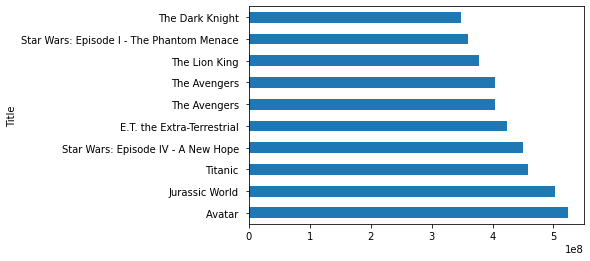

In [41]:
sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=[False])
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()

## 7. Зведені таблиці

Зведена таблиця містить дані іншої таблиці, які  згруповані за індексом та до яких застосовані такі операції, як сортування, підсумовування або усереднення.

Для побудови зведеної таблиці потрібно спочатку визначити стовпчик або стовпці, які будуть індексами, та стовпець, до якого буде застосована формула. Якщо вибрати Year як стовпець індексу та Gross Earnings як стовпець для пісумовування то можна створити з цих даних окремий DataFrame.

In [42]:
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head(20)

,Year,Gross Earnings
Title,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,NaN
Over the Hill to the Poorhouse,1920.0,3000000.0
The Big Parade,1925.0,NaN
Metropolis,1927.0,26435.0
Pandora's Box,1929.0,9950.0
The Broadway Melody,1929.0,2808000.0
Hell's Angels,1930.0,NaN
A Farewell to Arms,1932.0,NaN
42nd Street,1933.0,2300000.0


Тепре можна отримати зведену таблицю

In [43]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


Графічно ця інформація виглядає наступним чином

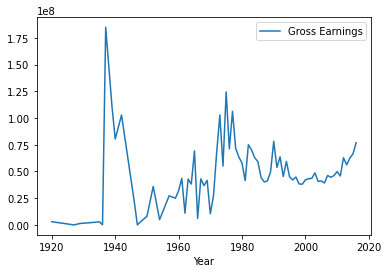

In [44]:
earnings_by_year.plot()
plt.show()

Подібні обчислення можна провести для декількох стовпців. Наприклад спочатку побудуємо DataFrame на основі даних зі стовпців Country, Language та Gross Earnings

In [45]:
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()

,Country,Language,Gross Earnings
Title,,,
Intolerance: Love's Struggle Throughout the Ages,USA,NaN,NaN
Over the Hill to the Poorhouse,USA,NaN,3000000.0
The Big Parade,USA,NaN,NaN
Metropolis,Germany,German,26435.0
Pandora's Box,Germany,German,9950.0


Якщо використати два стовпці як індекс то можна отримати зведенну таблицю з відповідною інформацією

In [46]:
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()

Gross Earnings
Country     Language                  
Afghanistan Dari          1.127331e+06
Argentina   Spanish       7.230936e+06
Aruba       English       1.007614e+07
Australia   Aboriginal    6.165429e+06
            Dzongkha      5.052950e+05

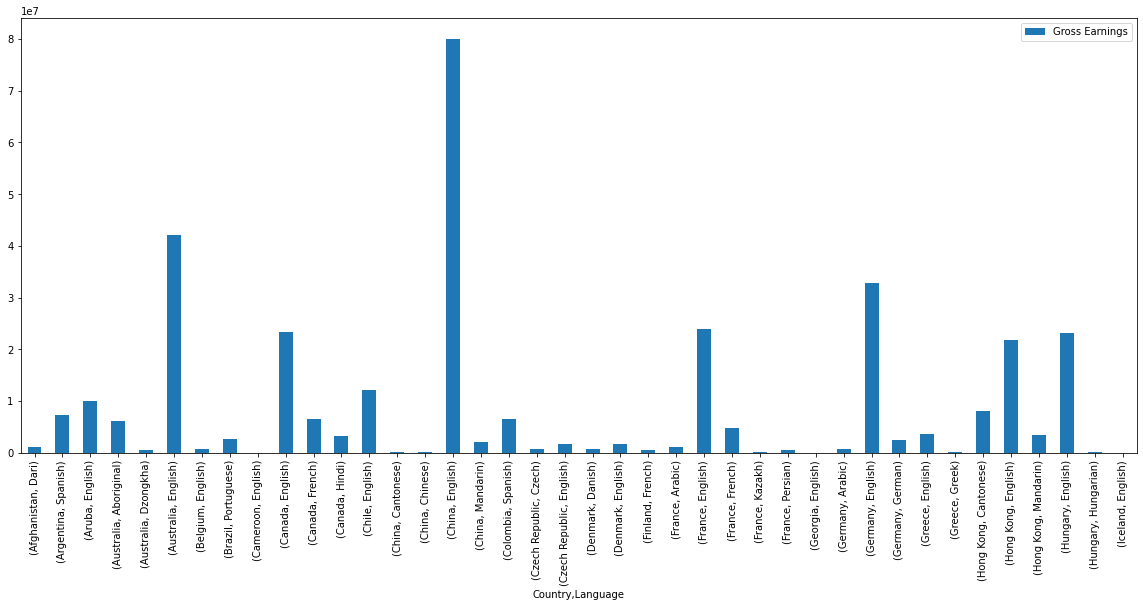

In [49]:
earnings_by_co_lang.head(40).plot(kind='bar', figsize=(20,8))
plt.show()

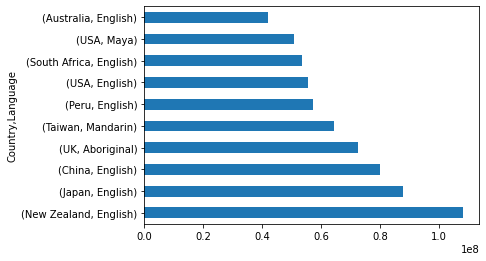

In [50]:
sorted_movies = earnings_by_co_lang[['Gross Earnings']].sort_values(['Gross Earnings'], ascending=[False])
sorted_movies.head(10)['Gross Earnings'].plot.barh()
plt.show()

## 8. Екcпорт даних

Результати опрацювання даних можна зберегти або експортувати у різноманітні формати. В pandas реалізовано методи для експорту даних у csv та Excel файли, LaTex та HTML таблиці, та інші .

Наступний приклад демонструє як експортувати об'єкт DataFrame у Excel файл. 

In [52]:
movies.to_excel('/content/drive/MyDrive/Data/output.xlsx')

За потреби можна опустити перший стовпчик, який містить індекси рядків.

In [53]:
movies.to_excel('//content/drive/MyDrive/Data/output.xlsx', index=False)

## Використання pandas початкової обробки даних з файлів csv 
(на основі Tutorial 2: Data Manipulation with pandas курсу Statistical Learning and Data Mining)

### 1. Набір даних

Використовується набір даних Credit.csv з підручника http://www-bcf.usc.edu/~gareth/ISL/index.html 
Набір даних містить інформацію про стан кредитних карток (баланс на кінець місяця та інформація про власника).  

### 2. Імпортування даних

Pandas надає засоби для роботи з файлами різних типів.

Набір даних у форматі `csv` й потрібно використовувати функцію pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html" target="_blank">read_csv</a> для імпортування даних з файлу. Функція дозволяє автоматично прочитати назви стовпців у файлі та визначити типи змінних. Змінна `data` буде містити посилання на об'єкт типу `DataFrame`, який буде використовуватися для збереження набору даних.

In [54]:
# We will always assume that the data file is in a real path
path = '/content/drive/MyDrive/Data/Credit.csv'
data = pd.read_csv(path)
type(data)

pandas.core.frame.DataFrame

Для встановлення шляху до файла доцільно скористатися командою `pwd` щоб дізнатися з якого місця виконується блокнот. Якщо файл з даними знаходиться у тій самій теці що блокнот можна викликати функцію безпосередньо вказавши назву файла як шлях `pd.read_csv('Credit.csv')`.

In [55]:
pwd

'/content/drive'

In [56]:
# To get help on any function or object, append a question mark to it and run the cell.
pd.read_csv?

Набір даних Credit.csv доволі простий, але при роботі з іншими файлами виклик функції `read_csv` може бути набагато складнішим. В документації можна побачити, яка кількість аргументів може бути використана.

Pandas надає й інші спеціальні функції для роботи з файлами різних типів, наприклад для Excel файлів. За наступним посиланням можна переглянути перелік цих функцій <a href="http://pandas.pydata.org/pandas-docs/stable/io.html" target="_blank">here</a>. Функція  <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table" target="_blank">read table</a> дозволяє отримати дані з текстового файлу де стовпчики відділені пробілами. Для роботи з реляційними базами даних [relational database](https://en.wikipedia.org/wiki/Relational_database), дані з яких не завжди зберігаються на локальному комп'ютері можна використовувати функції `read_sql_table`, `read_sql_query`, та `read_sql`.  

### 3. Перегляд даних

Структура даних pandas `DataFrame` має багато спільного з табличними даними (наприклад, таблиці в Excel). Однак на противагу до таблиць немає можливості клацнути на комірку та змінити її значення. Доступ до даних в `DataFrame` здійснюється у інший спосіб. Спочатку це видається перепоною в роботі але потім стають зрозумілі переваги такого підходу. В деяких середовищах розробки на Python реалізовано графічні інтерфейси користувача GUI (graphical user interfaces), які дозволяють доступатися та змінювати значення у dataframes безпосередньо.  

Для роботи з даними потрібно спочатку їх переглянути. Для цього є два методи `head` та `tail`. Метод head дозволяє вивести на екран перші рядки даних (за замовчуванням п'ять). Метод tail дозволяє вивести на екран останні п'ять рядків. За потреби можна вказати яку кількість рядків потрібно вивести на екран. 

Якщо вказати тільки назву `DataFrame` то можна пегелянути всі дані, але їх обсяг буде обмежений налаштуваннями pandas. Змінити ці налаштування можна перглянувши рекомендації за наступним посиланням [here](http://stackoverflow.com/questions/19124601/is-there-a-way-to-pretty-print-the-entire-pandas-series-dataframe).

In [57]:
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [58]:
data.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [59]:
data.head(3)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


Рядки у `DataFrame` мають числовий індекс(потовщений шрифт зліва). Індексація які у Python починається з нуля. 

За потреби можна визначити змінну для індексів у `DataFrame` (яка буде буде міткою для кожного з рядків), що буде не числовим значенням. Наприклад, якщо дані це події, що відбувалися в різні моменти часу, то таким значенням може бути дата.  

В наборі даних `Credit` перший стовпчик це порядковий номер рядка даних.  В такому випадку можна ці дані використовувати як індекси рядків та присвоїти ці значення змінній в `DataFrame` при читанні файла. 

In [60]:
data=pd.read_csv(path, index_col=0)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Наступний важливий метод `info`. Цей метод дозволяє переглянути інформацію про кількість рядків, стовпчиків, типи даних кожного зі стовпчиків(`dtypes` у pandas) та перевірити чи є втрачені дані. 

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


Тип даних `object` dtype це найбільш загальний тип. Найчастише стопчики такого типу містять текстові дані. Якщо у стовпчику числові дані, але їх тип вказано як `object`, то потрібно виконати певні дії для вирішення цієї проблеми (змінити тип даних). Такі дії називають clean up. 

В наборі даних відсутні втрачні дані, оскільки функція `info` повідомляє що у dataframe 400 записів, а всі стовпчики містяь 400 не нульових значень. Інший спосіб це перевірити - знайти кількість нульових значень. 

In [62]:
data.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

### 4. Доступ до даних

В pandas є два способи отримати доступ до даних: за допомогою міток стовпчиків та рядків або за допомогою числових індексів. 

**4.1 Вибір стопців за міткою**

Якщо обрати один стовпчик то результат буде відрізнятися від попередніх результатів, оскільки функція повертає `Series` (спеціальний об'єкт для серії окремих даних) а не `DataFrame`. 

In [63]:
data['Income'].head()

1     14.891
2    106.025
3    104.593
4    148.924
5     55.882
Name: Income, dtype: float64

**4.2 Вибір декількох стовпців за їх мітками**

In [64]:
data[['Income','Education']].head()

,Income,Education
1,14.891,11
2,106.025,15
3,104.593,11
4,148.924,11
5,55.882,16


Потрібно звернути увагу що мітки були передані у метод як список рядків. Наступний приклад де наглядно демонструє. 

In [65]:
names=['Income','Education']
print(names)

['Income', 'Education']


In [66]:
data[names].head()

,Income,Education
1,14.891,11
2,106.025,15
3,104.593,11
4,148.924,11
5,55.882,16


**4.3 Вибір стовпця за числовим індексом**

Метод `iloc` дозволяє вибирати дані за числовими індесами. Індекс першого стовпця - 0. Синтаксис, який використовується вказує що потрібно обрати всі рядки стовпчика з індексом 1. 

In [67]:
data.iloc[:,1].head()

1    3606
2    6645
3    7075
4    9504
5    4897
Name: Limit, dtype: int64

**4.4 Вибір декількох рядків за їх числовими індексами**

Список індексів в аргументах методу дозволяє отримати декілька стовпців. 

In [69]:
data.iloc[5:12,[0,5]].head(12)

,Income,Education
6,80.180,10
7,20.996,12
8,71.408,9
9,15.125,13
10,71.061,19
11,63.095,14
12,15.045,16


Інший спосіб отримати подібний результат це скористатися зрізами. Якщо потрібно отримати дані з першого по шостого стовпців то потрібно вказати їх індекси черед двокрапку.

In [70]:
data.iloc[:,0:6].head(2)

,Income,Limit,Rating,Cards,Age,Education
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15


**4.5 Вибір рядків за мітками**

Метод `loc` дозволяє отримати рядки позначені індексами. 

In [71]:
data.loc[[1,2,5],:]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


При використанні зрізів потрібно звернути увагу, що будуть вибрані рядки включно з останнім індексом, який вказано у зрізі. 

In [72]:
data.loc[1:4,:]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964


Наступний приклад демонструє як працювати з мітками рядків, якщо використовуються не числові мітки. 

In [73]:
df = data.head(5).copy() # make a copy of the first five rows of the dataframe
df.index = ['a','b','c', 'd', 'e'] # replace the index with arbitrary labels
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
a,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
b,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
c,104.593,7075,514,4,71,11,Male,No,No,Asian,580
d,148.924,9504,681,3,36,11,Female,No,No,Asian,964
e,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [74]:
df.loc[['a','c'],:]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
a,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
c,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [75]:
df.loc['a':'c',:]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
a,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
b,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
c,104.593,7075,514,4,71,11,Male,No,No,Asian,580


**4.6 Вибір рядків за числовими індексами**

Такий спосіб доступу корисний коли змінна індексів це рядок або дата. Доступ відбувається за індексами починаючи з 0. 

In [76]:
data.iloc[:2,:]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [77]:
df.iloc[:2,:]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
a,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
b,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


**4.7 Одночасний вибір рядків та стовпців**

За потреби можна поєднувати вибір рядків та стовпців. 

In [78]:
data.loc[1:2,['Income', 'Education']] # label indexing

,Income,Education
1,14.891,11
2,106.025,15


In [79]:
df_1 = data.loc[1:2,['Income', 'Education']]

In [80]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     2 non-null      float64
 1   Education  2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 48.0 bytes


In [81]:
data.iloc[:2,[0,5]]  # numerical indexing

,Income,Education
1,14.891,11
2,106.025,15


**4.8 Поєднання міток та числових індексів**

Зріз `DataFrame` є також об'єктом pandas. Отже, можна скористатися операторм . (крапка) та будувати синтаксичні конструкції де будуть поєднуватися мітки та числові індеси.

In [82]:
data[['Income', 'Education']].iloc[0:2,:]

,Income,Education
1,14.891,11
2,106.025,15


**4.9 Вибір рядків за типим даних**

За потреби можна вибрати всі стовпці певного типу `dtype` що дозволить їх одночасно обробити. Наступний приклад це демонструє. 

In [83]:
text_variables=data.select_dtypes(['object'])
text_variables.head()

,Gender,Student,Married,Ethnicity
1,Male,No,Yes,Caucasian
2,Female,Yes,Yes,Asian
3,Male,No,No,Asian
4,Female,No,No,Asian
5,Male,No,Yes,Caucasian


### 5. Вибір даних за умовою

Нехай потрібно потрібно знайти середнє значення балансу по всіх кредитних картках, які належать чоловікам. Нижче показано як обрати потрібні стовпці та знайти середнє значення.

In [84]:
data.loc[data['Gender']=='Male','Balance'].mean()

509.8031088082902

В аргументах методу `loc` вказано булевий вираз, який дозволяє створити бінарні змінні що приймають значення `True` чи `False` для кожного рядка. Наступний приклад демострує це більш детально.

In [ ]:
print(data['Gender'].head())
print('')
print((data['Gender']=='Female').head())

1      Male
2    Female
3      Male
4    Female
5      Male
Name: Gender, dtype: object

1    False
2     True
3    False
4     True
5    False
Name: Gender, dtype: bool


Можна використовувати й більш складні умовні конструкції. Наступний приклад демонструє як обрати дані про жінок, що молодші за 30 років та знайти їх середнє значення.  

In [ ]:
data.loc[(data['Gender']=='Female') & (data['Age']<30),'Balance'].mean()

540.7058823529412

За наступним посиланням <a href="http://www.tutorialspoint.com/python/python_basic_operators.htm" target="_blank">reference page</a> можна повторити матеріал про умовні оператори в Python. 

### 6. Присвоювання значень

Метод <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html" target="_blank">unique</a> pandas дозволяє переглянути всі унікальні значення у стовпці. 

In [85]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [86]:
data['Age'].unique()

array([34, 82, 71, 36, 68, 77, 37, 87, 66, 41, 30, 64, 57, 49, 75, 73, 69,
       28, 44, 63, 72, 61, 48, 25, 55, 47, 43, 54, 24, 50, 27, 32, 60, 79,
       65, 70, 81, 35, 59, 38, 78, 31, 45, 40, 83, 33, 52, 42, 51, 26, 46,
       74, 56, 53, 58, 62, 67, 84, 89, 80, 29, 85, 39, 91, 76, 86, 98, 23])

Наступний приклад демострує як можна одночасно присвоїти значення у стовпці з використанням умови. 

Також цей приклад показує які проблеми можуть містити дані. Якщо значення містить один зайвий пробіл то при роботі з таким даними часто можна отримувати помилки, які не легко зрозуміти. 

In [88]:
data.loc[data['Gender']=='Male','Gender']=' Male'
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [89]:
data['Gender'].unique()

array([' Male', 'Female'], dtype=object)

In [92]:
data.loc[(data['Gender']=='Male') & (data['Age']<30),'Balance'].mean()

467.2857142857143

In [91]:
data.loc[data['Gender']==' Male','Gender']='Male'
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### 7. Описова статистика (Descriptive statistics)

Після завантаження даних можна починати їх аналіз. Найпростіше що можна зробити це обчислити статистичні характеристики. Метод `describe` дозволяє отримати таблицю з цими статистичними даними.  

In [93]:
data.describe().round(1) 
# round to limit the number of decimal places in the output, try without it

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,45.2,4735.6,354.9,3.0,55.7,13.4,520.0
std,35.2,2308.2,154.7,1.4,17.2,3.1,459.8
min,10.4,855.0,93.0,1.0,23.0,5.0,0.0
25%,21.0,3088.0,247.2,2.0,41.8,11.0,68.8
50%,33.1,4622.5,344.0,3.0,56.0,14.0,459.5
75%,57.5,5872.8,437.2,4.0,70.0,16.0,863.0
max,186.6,13913.0,982.0,9.0,98.0,20.0,1999.0


In [94]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [95]:
data.describe().round()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,45.0,4736.0,355.0,3.0,56.0,13.0,520.0
std,35.0,2308.0,155.0,1.0,17.0,3.0,460.0
min,10.0,855.0,93.0,1.0,23.0,5.0,0.0
25%,21.0,3088.0,247.0,2.0,42.0,11.0,69.0
50%,33.0,4622.0,344.0,3.0,56.0,14.0,460.0
75%,57.0,5873.0,437.0,4.0,70.0,16.0,863.0
max,187.0,13913.0,982.0,9.0,98.0,20.0,1999.0


Статистичні характеристики можна обчислити за допомогою окремих функцій. Якщо звернутися до документації [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) то можна дізнатися перелік цих функцій. Наприклда, нижче обчислено: (a) середнє значення всіх змінних в наборі даних (b) кореляцію між income та лімітом кредитних карток. 

In [ ]:
data.mean().round(2)

Income         45.22
Limit        4735.60
Rating        354.94
Cards           2.96
Age            55.67
Education      13.45
Balance       520.02
dtype: float64

In [ ]:
data[['Income','Limit']].corr().round(2)

,Income,Limit
Income,1.00,0.79
Limit,0.79,1.00


### 8. Експорт даних

Результати опрацювання даних можна зберегти або експортувати у різноманітні формати. В pandas реалізовано методи для експорту даних у <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html" target="_blank">csv</a> та <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html" target="_blank">Excel</a> файли, <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_latex.html" target="_blank">LaTex</a> та <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_html.html" target="_blank">HTML</a> таблиці, та інші <a href='http://pandas.pydata.org/pandas-docs/stable/api.html#id12' target="_blank"></a>.

Наступний приклад демонструє як експортувати об'єкт <TT>DataFrame</TT> у Excel файл. 

In [ ]:
data.to_excel(path[:-4]+'_new_data.xlsx')

## Варто прочитати:
- Data Wrangling with Pandas (Short Guide) (http://www.marcelscharth.com/python/pandas.html)
- 10 minutes to pandas (https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)